In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
credit = pd.read_csv("simulated_credit_risk_data.csv")

In [32]:
credit.head(20)

,CustomerID,Month,CreditState
0,1,1,Good
1,1,2,VeryLate
2,1,3,VeryLate
3,1,4,VeryLate
4,1,5,Late
5,1,6,Good
6,1,7,Good
7,1,8,Late
8,1,9,Late
9,1,10,VeryLate


In [34]:
credit['CustomerID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [36]:
credit['CreditState'].unique()

array(['Good', 'VeryLate', 'Late', 'Default'], dtype=object)

In [38]:
pivot = credit.pivot(index='Month', columns='CustomerID', values='CreditState')

In [40]:
pivot.head(12)

CustomerID,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
Month,,,,,,,,,,,,,,,,,,,,,
1,Good,Good,Good,Good,Good,Good,Good,Good,Good,Good,...,Good,Good,Late,Good,Good,Good,Good,Good,Good,Good
2,VeryLate,Good,Good,Good,Good,Good,Good,Good,Good,Good,...,Good,Good,Good,Good,Good,Good,Late,Good,Good,Good
3,VeryLate,Good,Good,Good,VeryLate,Good,Good,Good,Good,Good,...,Good,Good,Good,Good,Good,Good,VeryLate,Good,Good,Good
4,VeryLate,Good,Good,Good,Default,Good,Good,Good,Good,Good,...,Good,Good,Good,Good,Good,Good,Late,Good,Good,Good
5,Late,Good,Good,Good,Default,Good,Good,Late,Good,Late,...,Good,Good,Good,Late,Good,Late,Default,Good,Good,Good
6,Good,Good,Good,Good,Default,Good,Good,Late,Good,VeryLate,...,Good,Good,Good,VeryLate,Good,Late,Default,Good,Late,Good
7,Good,Good,Good,Good,Default,Good,Good,Good,Good,VeryLate,...,VeryLate,Good,Good,VeryLate,Good,Late,Default,Good,Default,Late
8,Late,Good,Good,Late,Default,Good,Good,Good,Good,Default,...,VeryLate,Good,Late,VeryLate,Good,Good,Default,Good,Default,Good
9,Late,Good,Good,Good,Default,Good,Late,Good,Late,Default,...,VeryLate,Good,Late,Default,Good,Good,Default,Good,Default,Good


In [42]:
# Credit states and mappings
states = ["Good", "Late", "VeryLate", "Default"]
n_states = len(states)

# Initial distribution per customer: frequency of each state
initial_distributions = pivot.apply(lambda col: col.value_counts(normalize=True), axis=0).T.fillna(0)
initial_distributions = initial_distributions[states]  # Ensure consistent column order

print("\n🔹 Initial Distribution Per Customer:")
print(initial_distributions.head(200))
    


🔹 Initial Distribution Per Customer:
                Good      Late  VeryLate   Default
CustomerID                                        
1           0.333333  0.250000  0.416667  0.000000
2           1.000000  0.000000  0.000000  0.000000
3           0.750000  0.083333  0.000000  0.166667
4           0.916667  0.083333  0.000000  0.000000
5           0.166667  0.000000  0.083333  0.750000
...              ...       ...       ...       ...
196         0.666667  0.333333  0.000000  0.000000
197         0.083333  0.166667  0.083333  0.666667
198         1.000000  0.000000  0.000000  0.000000
199         0.416667  0.083333  0.000000  0.500000
200         0.916667  0.083333  0.000000  0.000000

[200 rows x 4 columns]


In [44]:
# Helper: map state to index
state_index = {state: i for i, state in enumerate(states)}

# Function to compute TPM for one customer
def compute_customer_tpm(customer_series):
    transition_counts = np.zeros((n_states, n_states))
    customer_states = customer_series.values

    for i in range(len(customer_states) - 1):
        s1 = customer_states[i]
        s2 = customer_states[i + 1]
        if pd.notna(s1) and pd.notna(s2):
            from_idx = state_index[s1]
            to_idx = state_index[s2]
            transition_counts[from_idx, to_idx] += 1

    # Normalize
    row_sums = transition_counts.sum(axis=1, keepdims=True)
    with np.errstate(divide='ignore', invalid='ignore'):
        tpm = np.divide(transition_counts, row_sums, where=row_sums != 0)
    return tpm

# Compute TPM for all customers
customer_tpms = {customer: compute_customer_tpm(pivot[customer]) for customer in pivot.columns}

# Example: Show TPM for one customer
cust_to_show = pivot.columns[0]
print(f"\n🔹 Transition Matrix for Customer: {cust_to_show}")
df_tpm = pd.DataFrame(customer_tpms[cust_to_show], index=states, columns=states)
print(df_tpm)



🔹 Transition Matrix for Customer: 1
              Good      Late  VeryLate  Default
Good      0.250000  0.250000  0.500000      0.0
Late      0.333333  0.333333  0.333333      0.0
VeryLate  0.250000  0.250000  0.500000      0.0
Default   0.000000  0.000000  0.000000      0.0


In [46]:
# States and mappings
states = ["Good", "Late", "VeryLate", "Default"]
n_states = len(states)

# Helper: calculate initial distribution from customer's observed data
def get_initial_dist(customer_series):
    counts = customer_series.value_counts(normalize=True)
    return np.array([counts.get(state, 0.0) for state in states])

# Predict 12-month distribution per customer using their TPM
predicted_12mo_dist = {}

for customer_id in pivot.columns:
    tpm = customer_tpms[customer_id]
    initial_dist = get_initial_dist(pivot[customer_id])
    
    # Apply Markov chain: d_12 = d_0 * P^12
    dist = initial_dist.copy()
    for _ in range(12):
        dist = dist @ tpm
    
    predicted_12mo_dist[customer_id] = dist

# Convert to DataFrame
df_12mo_forecast = pd.DataFrame(predicted_12mo_dist).T
df_12mo_forecast.columns = states
print("\n📈 Credit State Forecast at Month 12 Per Customer:")
print(df_12mo_forecast.head(200))



📈 Credit State Forecast at Month 12 Per Customer:
         Good      Late  VeryLate   Default
1    0.272727  0.272727  0.454545  0.000000
2    1.000000  0.000000  0.000000  0.000000
3    0.182487  0.022811  0.000000  0.794703
4    0.909091  0.090909  0.000000  0.000000
5    0.000041  0.000000  0.000041  0.999919
..        ...       ...       ...       ...
196  0.571431  0.428569  0.000000  0.000000
197  0.000000  0.002604  0.002604  0.994792
198  1.000000  0.000000  0.000000  0.000000
199  0.028633  0.007158  0.000000  0.964209
200  0.909091  0.090909  0.000000  0.000000

[200 rows x 4 columns]


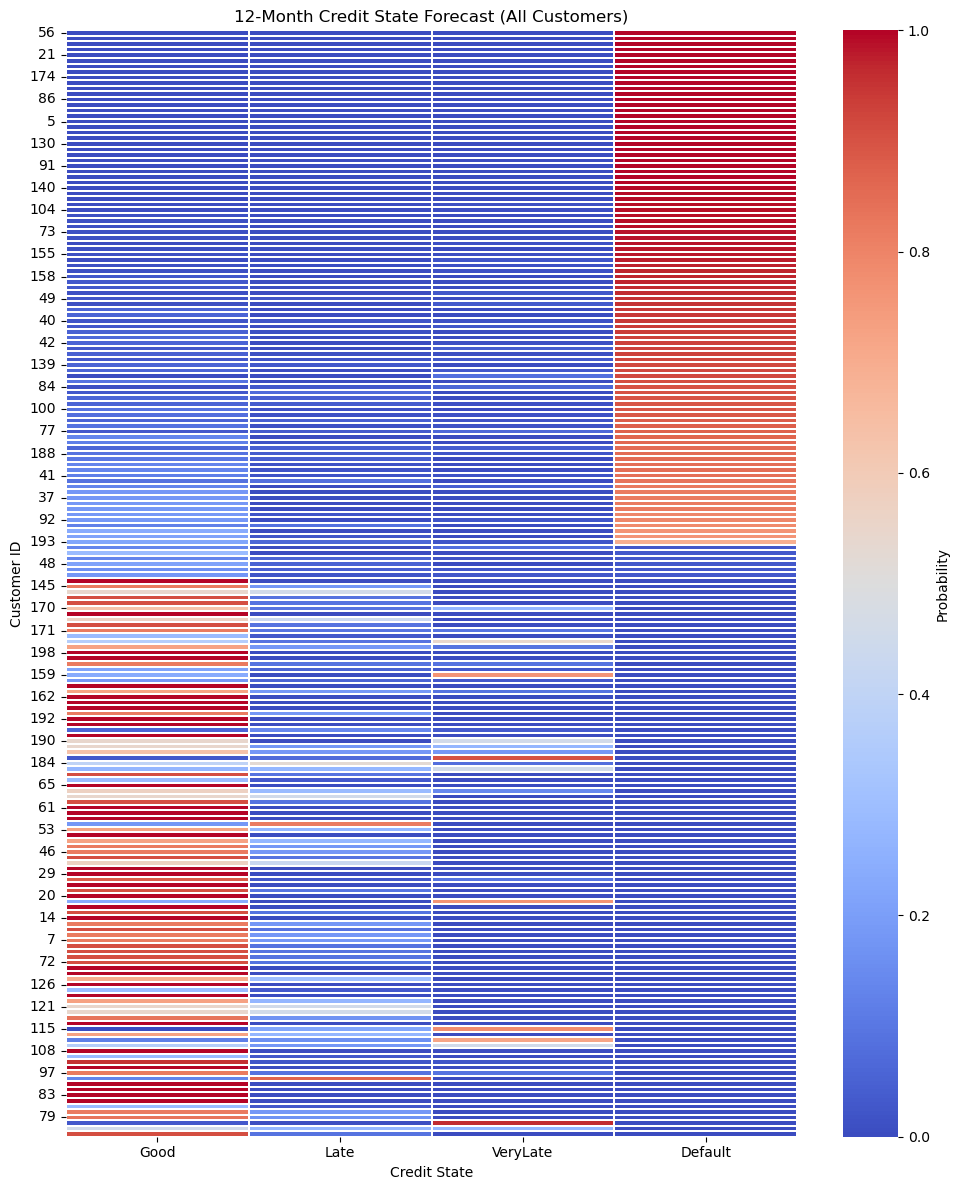

In [48]:
# Heatmap for all customers (nicer colors, compact view)
plt.figure(figsize=(10, 12))
sns.heatmap(df_12mo_forecast.sort_values(by="Default", ascending=False), 
            annot=False, cmap="coolwarm", linewidths=0.3, cbar_kws={"label": "Probability"})

plt.title("12-Month Credit State Forecast (All Customers)")
plt.xlabel("Credit State")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.savefig("credit_forecast_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()
